#  XYZ Cab Investment Analysis (2016–2018)

###  Objective
XYZ is considering investing in the U.S. cab industry. We analyzed data from two companies **Yellow Cab** and **Pink Cab** to determine which company offers better customer reach, retention, profitability, and market potential.

This notebook contains an end-to-end exploratory data analysis based on 10 business hypotheses.


In [754]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [755]:
df_cab_data = pd.read_csv("Cab_Data.csv")
df_city = pd.read_csv("City.csv")
df_customer = pd.read_csv("Customer_ID.csv")
df_transaction = pd.read_csv("Transaction_ID.csv")


## Cab Data


In [756]:
df_cab_data.shape

(359392, 7)

In [757]:
df_cab_data.sample(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
111246,10136226,42742,Yellow Cab,WASHINGTON DC,40.17,689.94,573.6276
54745,10068676,42605,Yellow Cab,NEW YORK NY,29.25,673.88,365.0400
184221,10226758,43001,Yellow Cab,BOSTON MA,9.36,152.79,130.2912
310448,10381128,43369,Pink Cab,CHICAGO IL,13.26,132.13,148.5120
174271,10214877,42972,Yellow Cab,WASHINGTON DC,9.04,154.22,130.1760
261189,10320454,43211,Pink Cab,WASHINGTON DC,4.60,57.28,47.3800
88294,10108971,42686,Yellow Cab,WASHINGTON DC,5.30,101.72,65.5080
5557,10007195,42405,Yellow Cab,WASHINGTON DC,6.00,117.99,75.6000
225382,10275560,43085,Pink Cab,SACRAMENTO CA,9.54,138.71,102.0780
200942,10246681,43030,Yellow Cab,DALLAS TX,31.04,644.00,432.0768


In [758]:
df_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [759]:
df_cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [760]:
df_cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [761]:
df_cab_data.duplicated().sum()

0

In [762]:
df_cab_data.corr(numeric_only=True)

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
Transaction ID,1.000000,0.993030,-0.001429,-0.052902,-0.003462
Date of Travel,0.993030,1.000000,-0.001621,-0.055559,-0.004484
KM Travelled,-0.001429,-0.001621,1.000000,0.835753,0.981848
Price Charged,-0.052902,-0.055559,0.835753,1.000000,0.859812
Cost of Trip,-0.003462,-0.004484,0.981848,0.859812,1.000000


In [763]:
# Converted Date into Date and Time Formate

df_cab_data['Date of Travel'] = pd.to_datetime(df_cab_data['Date of Travel'], unit='D', origin='1899-12-30')

In [764]:
df_cab_data.sample(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
103347,10126604,2016-12-20,Yellow Cab,NEW YORK NY,22.31,532.75,294.4920
7266,10009259,2016-02-17,Pink Cab,SAN DIEGO CA,14.40,173.85,145.4400
304311,10373806,2018-09-06,Yellow Cab,SILICON VALLEY,23.54,443.81,299.4288
293215,10360264,2018-08-14,Yellow Cab,NEW YORK NY,9.04,194.04,113.9040
326417,10400154,2018-11-01,Pink Cab,SAN DIEGO CA,20.33,243.57,217.5310
277903,10341444,2018-06-23,Yellow Cab,CHICAGO IL,43.66,789.57,607.7472
357917,10438160,2018-01-08,Yellow Cab,CHICAGO IL,39.14,481.46,540.1320
330722,10405420,2018-11-13,Yellow Cab,DENVER CO,38.08,666.15,456.9600
289538,10355853,2018-08-03,Pink Cab,ATLANTA GA,44.46,537.48,529.0740
352473,10431295,2018-12-23,Yellow Cab,NEW YORK NY,10.71,237.98,136.2312


## City Data


In [765]:
df_city.shape

(20, 3)

In [766]:
df_city.sample(10)

,City,Population,Users
11,AUSTIN TX,"698,371","14,978"
15,SACRAMENTO CA,"545,776","7,044"
13,TUCSON AZ,"631,442","5,712"
19,BOSTON MA,"248,968","80,021"
7,PHOENIX AZ,"943,999","6,133"
3,MIAMI FL,"1,339,155","17,675"
0,NEW YORK NY,"8,405,837","302,149"
16,PITTSBURGH PA,"542,085","3,643"
6,SAN DIEGO CA,"959,307","69,995"
4,SILICON VALLEY,"1,177,609","27,247"


In [767]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [768]:

df_city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [769]:
df_city.duplicated().sum()

0

In [770]:
df_city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [771]:
df_city['Population'] = df_city['Population'].str.replace(',','').astype('int64')
df_city['Users'] = df_city['Users'].str.replace(',','').astype('int64')

In [772]:
df_city.sample(10)

,City,Population,Users
4,SILICON VALLEY,1177609,27247
13,TUCSON AZ,631442,5712
10,DENVER CO,754233,12421
14,SAN FRANCISCO CA,629591,213609
5,ORANGE COUNTY,1030185,12994
7,PHOENIX AZ,943999,6133
18,NASHVILLE TN,327225,9270
12,SEATTLE WA,671238,25063
17,WASHINGTON DC,418859,127001
2,LOS ANGELES CA,1595037,144132


In [773]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes


## Customer Data

In [774]:
df_customer.shape

(49171, 4)

In [775]:
df_customer.sample(5)

,Customer ID,Gender,Age,Income (USD/Month)
44638,45678,Male,60,12812
15403,36201,Female,20,6071
40575,12118,Female,42,30233
15234,34962,Male,38,12000
4730,44742,Male,47,5043


In [776]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [777]:
df_customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [778]:
df_customer.duplicated().sum()

0

In [779]:
df_customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [780]:
df_customer.corr(numeric_only=True)

,Customer ID,Age,Income (USD/Month)
Customer ID,1.000000,-0.006749,-0.006911
Age,-0.006749,1.000000,0.000156
Income (USD/Month),-0.006911,0.000156,1.000000


## Transaction Data


In [781]:
df_transaction.shape

(440098, 3)

In [782]:
df_transaction.sample(5)

,Transaction ID,Customer ID,Payment_Mode
265717,10265728,14394,Cash
247726,10247737,579,Card
195290,10195301,2732,Cash
215467,10215478,89,Cash
373188,10373199,1735,Card


In [783]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [784]:
df_transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [785]:
df_transaction.duplicated().sum()

0

### Master Dataset

In [786]:
Master_Data = pd.merge(df_cab_data, df_transaction, on='Transaction ID', how='left')

In [787]:
Master_Data = pd.merge(Master_Data, df_customer, on='Customer ID', how='left')

In [788]:
Master_Data = pd.merge(Master_Data, df_city, on='City', how='left')

In [789]:
Master_Data.shape

(359392, 14)

In [790]:
Master_Data.sample(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
308187,10378534,2018-09-21,Pink Cab,WASHINGTON DC,28.60,405.41,294.5800,53157,Cash,Female,57,8274,418859,127001
17345,10022071,2016-04-03,Pink Cab,AUSTIN TX,36.30,555.95,417.4500,33095,Card,Female,23,22378,698371,14978
253784,10310801,2018-03-20,Yellow Cab,NEW YORK NY,38.28,1080.84,491.5152,1481,Cash,Male,38,9336,8405837,302149
279388,10343204,2018-07-02,Pink Cab,NEW YORK NY,6.54,76.61,70.6320,2833,Card,Male,56,21491,8405837,302149
111083,10135869,2017-01-06,Yellow Cab,ORANGE COUNTY,32.55,1169.62,398.4120,15910,Card,Male,64,9535,1030185,12994
353985,10433172,2018-12-26,Pink Cab,CHICAGO IL,35.52,446.06,369.4080,4700,Card,Female,40,10574,1955130,164468
101391,10124313,2016-12-25,Pink Cab,LOS ANGELES CA,44.40,606.30,475.0800,7786,Card,Male,55,5336,1595037,144132
354910,10434412,2018-12-31,Yellow Cab,CHICAGO IL,37.62,518.45,532.6992,4966,Card,Female,61,12045,1955130,164468
248084,10303623,2018-02-22,Pink Cab,NEW YORK NY,33.95,440.97,366.6600,1237,Card,Male,21,8044,8405837,302149
116419,10142699,2017-02-06,Yellow Cab,SAN DIEGO CA,2.85,58.03,38.3040,18561,Card,Male,22,15635,959307,69995


In [791]:
Master_Data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [792]:
Master_Data.duplicated().sum()

0

In [793]:
Master_Data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,2017-08-17 01:37:55.042293760,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
min,1.000001e+07,2016-01-02 00:00:00,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,2016-11-23 00:00:00,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,2017-09-10 00:00:00,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,2018-05-12 00:00:00,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,2018-12-31 00:00:00,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000
std,1.268058e+05,NaN,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020


In [794]:
Master_Data.corr(numeric_only=True)

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


### Two New Features

In [795]:
Master_Data['Profit'] = Master_Data['Price Charged']- Master_Data['Cost of Trip']

In [796]:
Master_Data['Profit Margin'] = (Master_Data['Profit']/ Master_Data['Price Charged'])*100

In [797]:
Master_Data.sample(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Profit Margin
343686,10421014,2018-12-08,Yellow Cab,BOSTON MA,12.24,178.43,151.2864,58286,Cash,Male,39,6974,248968,80021,27.1436,15.212464
171374,10211027,2017-08-13,Yellow Cab,NEW YORK NY,35.64,864.09,461.8944,65,Card,Female,51,11121,8405837,302149,402.1956,46.545568
263566,10323269,2018-04-28,Yellow Cab,NEW YORK NY,12.84,334.49,163.3248,1801,Card,Female,28,20344,8405837,302149,171.1652,51.171993
171380,10211033,2017-08-16,Yellow Cab,NEW YORK NY,4.56,96.65,58.0032,784,Card,Male,33,9209,8405837,302149,38.6468,39.986342
253853,10310870,2018-03-13,Yellow Cab,NEW YORK NY,25.92,652.15,317.2608,910,Card,Male,62,12093,8405837,302149,334.8892,51.351560
272989,10335058,2018-06-01,Yellow Cab,NEW YORK NY,37.83,1122.62,494.8164,584,Cash,Female,21,9905,8405837,302149,627.8036,55.923073
62708,10078336,2016-09-10,Yellow Cab,WASHINGTON DC,29.64,570.87,366.3504,53719,Card,Female,60,29515,418859,127001,204.5196,35.825950
235799,10288208,2018-01-05,Pink Cab,DENVER CO,24.70,320.09,293.9300,31409,Card,Female,53,16586,754233,12421,26.1600,8.172701
164680,10203265,2017-08-04,Yellow Cab,BOSTON MA,7.02,107.49,90.1368,58236,Card,Female,28,15274,248968,80021,17.3532,16.144013
18962,10024056,2016-04-12,Pink Cab,DENVER CO,32.77,374.99,350.6390,31163,Card,Female,39,6463,754233,12421,24.3510,6.493773


#### Which company has maximum cab users at a particular time period?

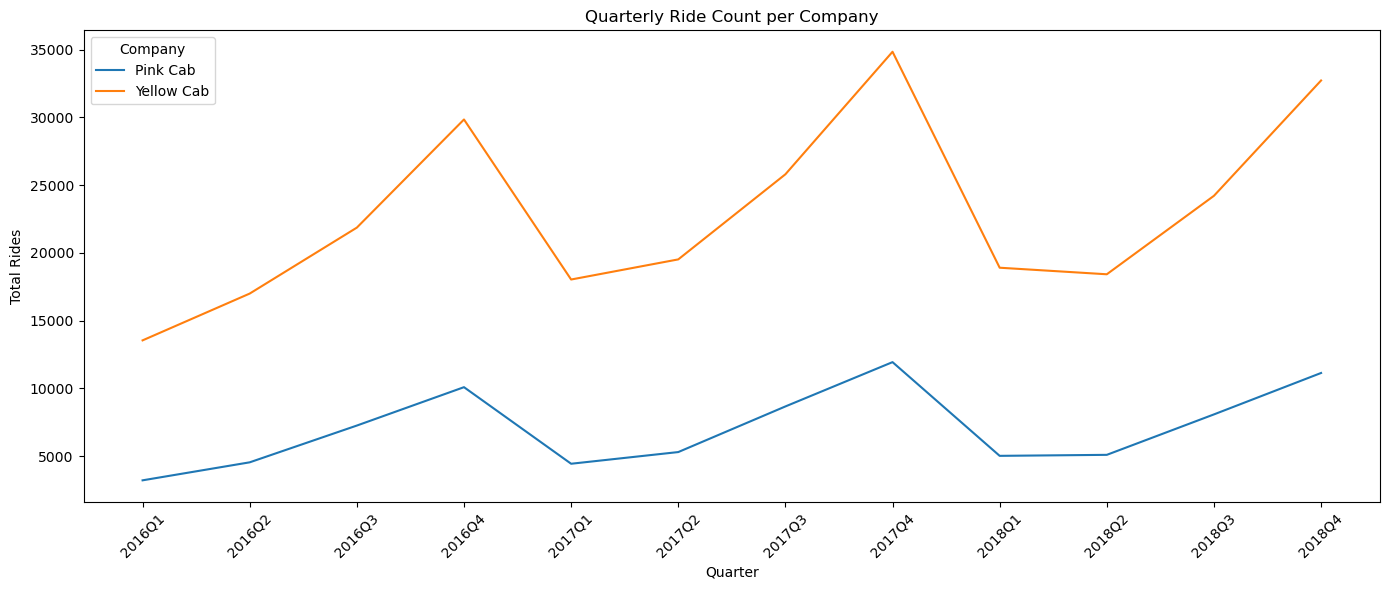

In [798]:
Master_Data['Quarter of Travel'] = Master_Data['Date of Travel'].dt.to_period('Q').astype(str) # Extract Quarter
Quarterly_User = Master_Data.groupby(['Quarter of Travel','Company'])['Transaction ID'].count().reset_index()
Quarterly_User.rename(columns={'Transaction ID':'Total Rides'},inplace=True)

plt.figure(figsize=(14,6))
plt.title("Quarterly Ride Count per Company")
sns.lineplot(x='Quarter of Travel', y='Total Rides', data=Quarterly_User, hue='Company')
plt.xticks(rotation=45)
plt.ylabel("Total Rides")
plt.xlabel("Quarter")
plt.tight_layout()
plt.show()


### Total Rides per Company per City

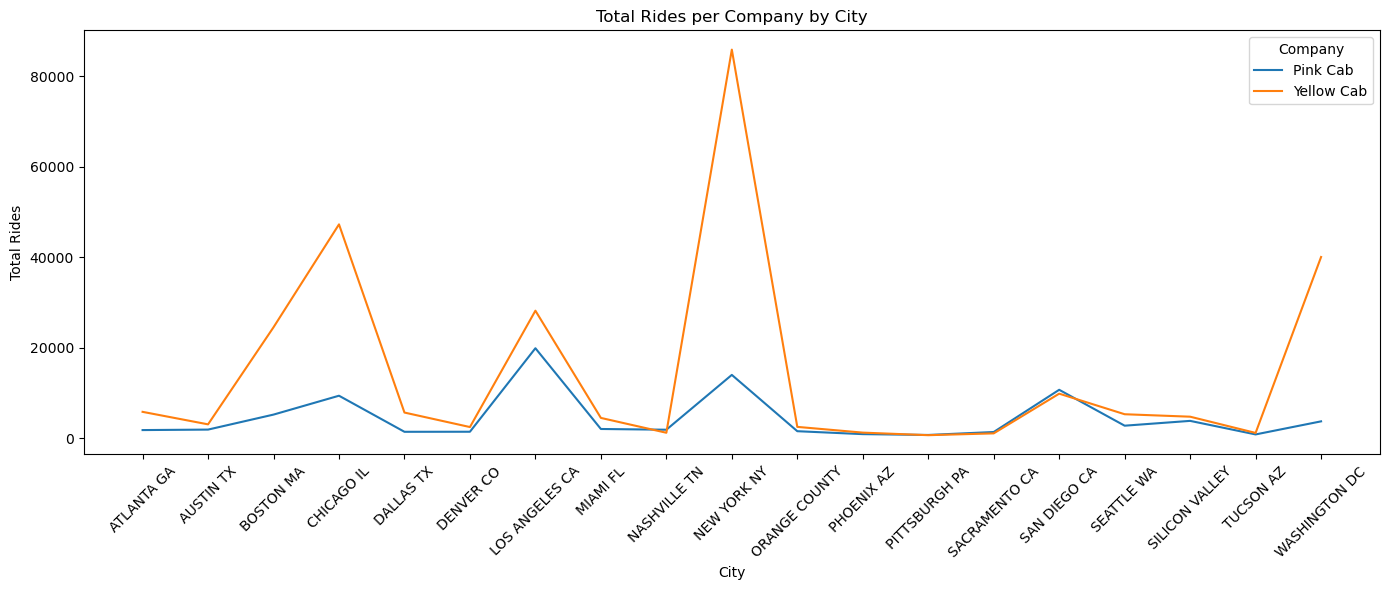

In [799]:
rider_by_city = Master_Data.groupby(['City','Company'])['Transaction ID'].count().reset_index()
rider_by_city.rename(columns={'Transaction ID':'Total Rides'},inplace=True)

plt.figure(figsize=(14,6))
plt.title("Total Rides per Company by City")
sns.lineplot(x='City', y='Total Rides', data=rider_by_city, hue='Company')
plt.xticks(rotation=45)
plt.ylabel("Total Rides")
plt.xlabel("City")
plt.tight_layout()
plt.show()

##  Hypothesis 1: Yellow Cab has higher unique customer reach across U.S. cities


In [800]:
Unique_Customer = Master_Data.groupby(['City','Company'])['Customer ID'].nunique().reset_index()
Unique_Customer.rename(columns={'Customer ID':'Unique Customer'},inplace=True)


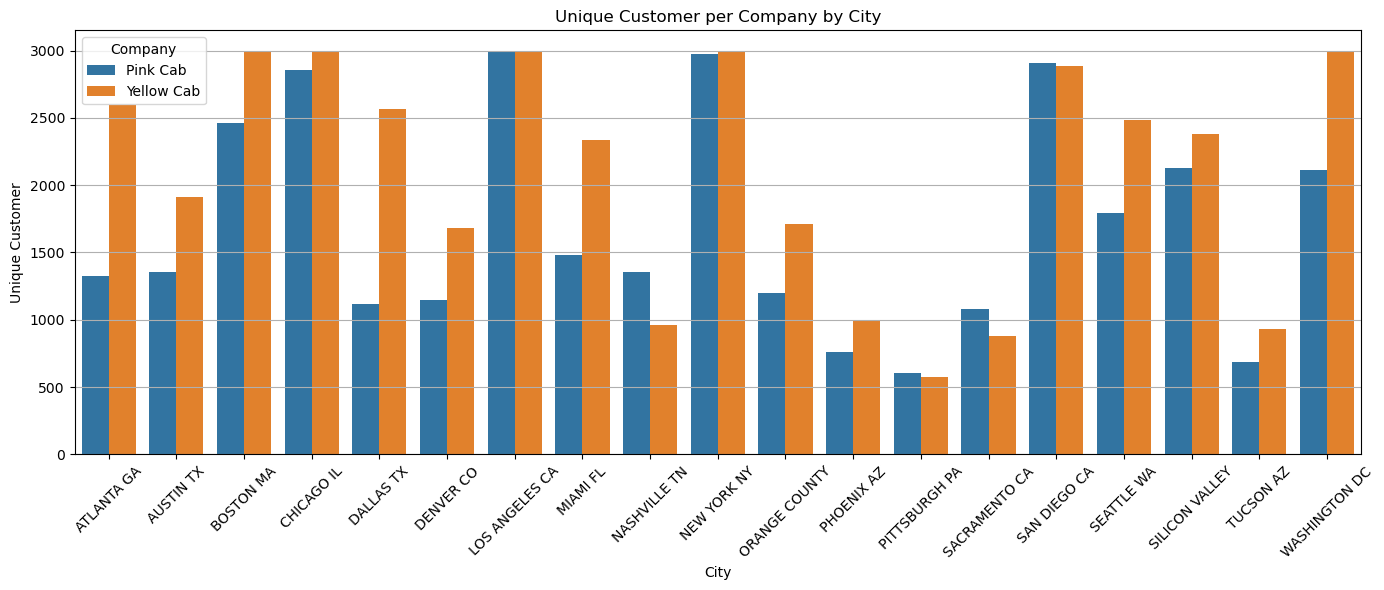

In [801]:
plt.figure(figsize=(14,6))
plt.title("Unique Customer per Company by City")
sns.barplot(x='City', y='Unique Customer', data=Unique_Customer, hue='Company')
plt.xticks(rotation=45)
plt.ylabel("Unique Customer")
plt.grid(axis='y')
plt.xlabel("City")
plt.tight_layout()
plt.show()

### Conclusion: 
Except for Los Angeles, New York, and Sacramento, Yellow Cab has a higher Unique customer reach across most US cities. This suggests stronger brand presence and market penetration, making it more attractive from a growth and user perspective.



## Hypothesis 2 - Yellow cab retains more loyal customers (5+ or 10+ rides) than Pink cab

In [802]:
rides = Master_Data.groupby(['Customer ID', 'Company'])['Transaction ID'].count().reset_index()
rides.rename(columns={'Transaction ID': 'Rides'},inplace=True)

rides_5 = rides[rides['Rides']>=5]
rides_10 = rides[rides['Rides']>=10]

In [803]:
loyal_c5_counts = rides_5.groupby('Company')['Customer ID'].nunique().reset_index()
loyal_c5_counts.rename(columns={'Customer ID': 'Loyal Customers (5+)'}, inplace=True)

loyal_c10_counts = rides_10.groupby('Company')['Customer ID'].nunique().reset_index()
loyal_c10_counts.rename(columns={'Customer ID': 'Loyal Customers (10+)'}, inplace=True)


<Figure size 800x500 with 0 Axes>

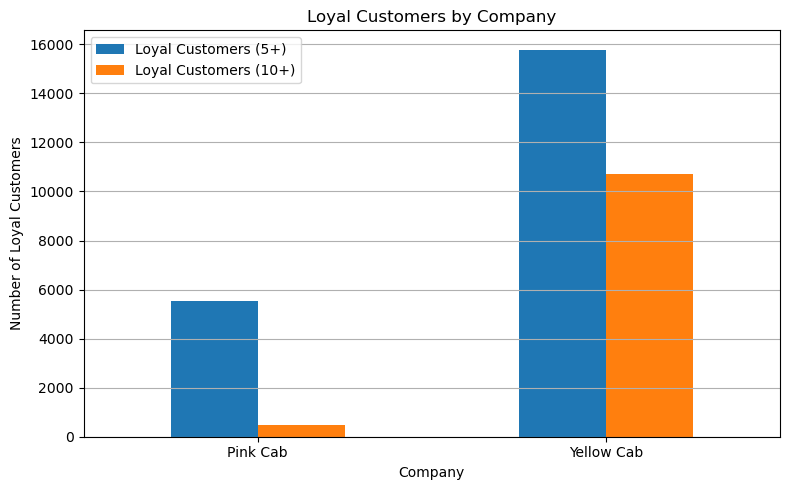

In [804]:
loyal_df = pd.merge(loyal_c5_counts, loyal_c10_counts, on='Company')

# Plot
plt.figure(figsize=(8, 5))
loyal_df.plot(kind='bar',figsize=(8,5),x='Company')
plt.title('Loyal Customers by Company')
plt.ylabel('Number of Loyal Customers')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Conclusion : 
Yellow Cab retains significantly more loyal customers than Pink Cab at both 5+ and 10+ ride thresholds. This reflects better customer satisfaction, engagement, and long-term value, which is a strong indicator of business health and investment potential.

## Hypothesis 3: Yellow cab has higher average profit per kilometer than Pink cab

In [805]:
Master_Data['profit_per_KM'] = Master_Data['Profit']/Master_Data['KM Travelled']

In [806]:
profit_per_KM = Master_Data[Master_Data['profit_per_KM']>0]
profit_per_KM = Master_Data[ Master_Data['profit_per_KM']<=25  ]
profit_per_KM

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Profit Margin,Quarter of Travel,profit_per_KM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,15.450869,2016Q1,1.882266
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,6.601026,2016Q1,0.826904
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701,27.5680,22.019169,2016Q1,3.049558
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885,24701,25.7980,6.835718,2016Q1,0.777751
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885,24701,16.8440,14.695516,2016Q1,1.929439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001,5.8800,8.492201,2018Q1,1.225000
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001,6.9020,6.067692,2018Q1,0.821667
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001,87.4200,20.001373,2018Q1,3.150270
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001,32.1420,21.986456,2018Q1,3.652500


**Note:** We removed extreme outliers with Profit/KM > 25 to make the boxplot easier to interpret.


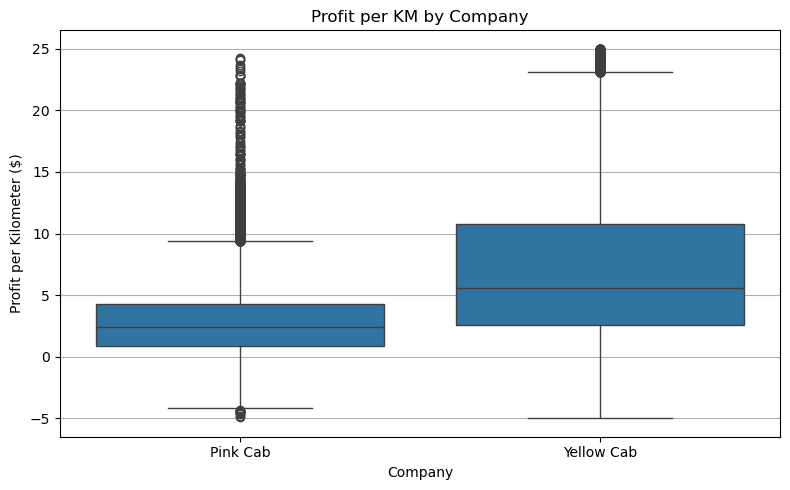

In [807]:
plt.figure(figsize=(8,5))
sns.boxplot(data=profit_per_KM, x='Company', y='profit_per_KM')
plt.title('Profit per KM by Company')
plt.ylabel('Profit per Kilometer ($)')
plt.xlabel('Company')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Conclusion
We have removed rows where Profit per KM > 25 to reduce s'kewness.
Yellow Cab demonstrates significantly better profitability per kilometer, making it a more cost-efficient and revenue-optimized operation compared to Pink Cab.

## Hypothesis 4: Higher income groups contribute more to overall profit, especially for Yellow cab

In [808]:
bins= [0, 5000, 10000, 15000, 20000, float('inf')]
labels = ['<5K', '5K–10K', '10K–15K', '15K–20K', '20K+']
Master_Data['Income Band'] = pd.cut(Master_Data['Income (USD/Month)'],bins=bins,labels=labels)

In [809]:
Income_Profit = Master_Data.groupby(['Income Band','Company'],observed=True)['Profit'].sum().reset_index()

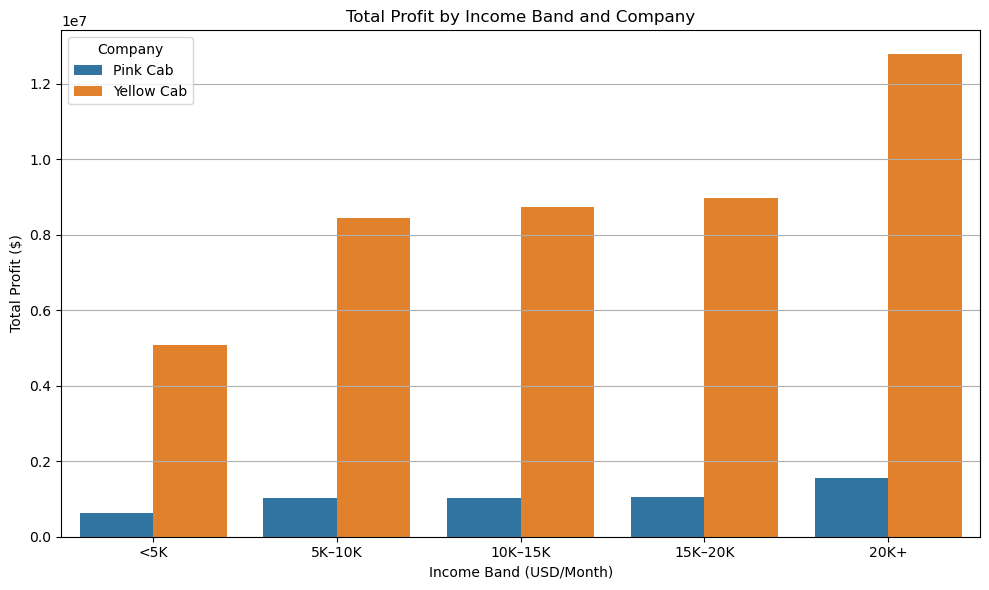

In [810]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Income_Profit, x='Income Band', y='Profit', hue='Company')
plt.title('Total Profit by Income Band and Company')
plt.ylabel('Total Profit ($)')
plt.xlabel('Income Band (USD/Month)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Conclusion
Higher income customers contribute more to overall profit.
Yellow Cab consistently earns more profit than Pink Cab across all income groups, with the largest difference seen in the 20K+ band.

## Hypothesis 5: There is strong seasonality in demand and profit for both companies

In [811]:
Master_Data['Month of Travel'] = Master_Data['Date of Travel'].dt.to_period('M').astype(str)
Monthly_Data = Master_Data.groupby(['Month of Travel','Company']).agg(
    {
        'Transaction ID' : 'count',
        'Profit' : 'sum'
    }
).reset_index()
Monthly_Data.rename(columns={'Transaction ID' : 'Ride Count'},inplace=True)

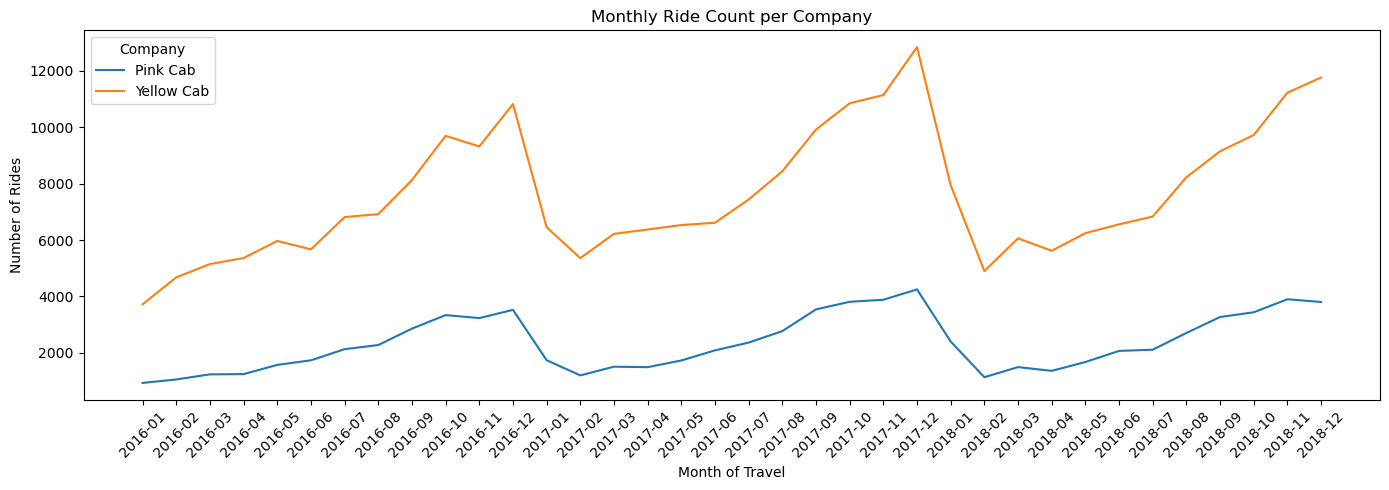

In [812]:
plt.figure(figsize=(14,5))
sns.lineplot(x='Month of Travel',y='Ride Count',data=Monthly_Data, hue='Company')
plt.xticks(rotation=45)
plt.title('Monthly Ride Count per Company')
plt.ylabel('Number of Rides')
plt.tight_layout()
plt.show()

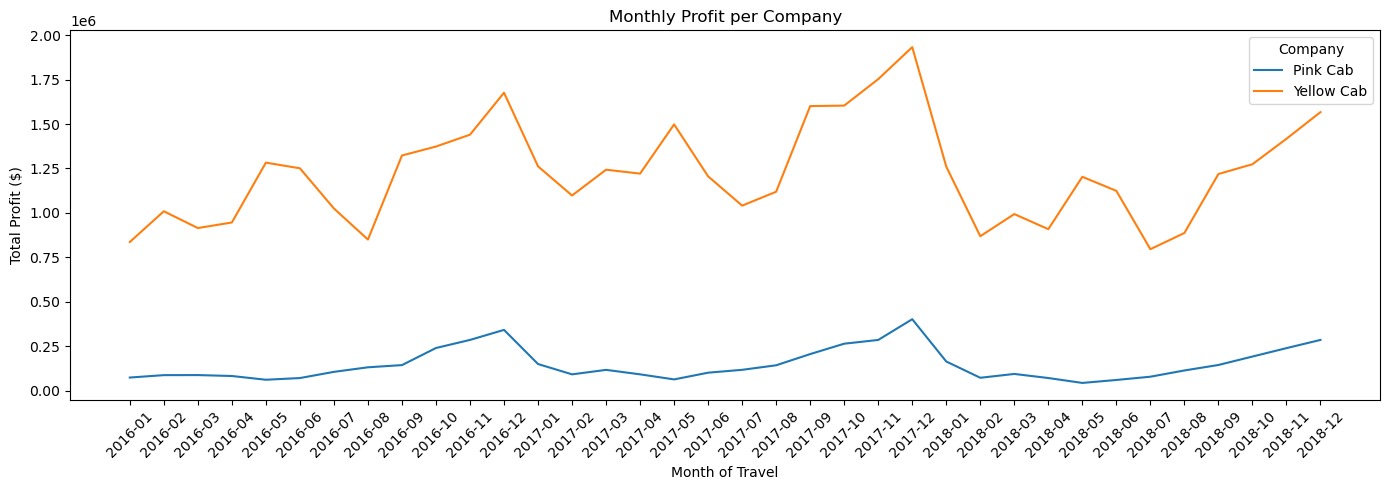

In [813]:
plt.figure(figsize=(14,5))
sns.lineplot(x='Month of Travel',y='Profit',data=Monthly_Data, hue='Company')
plt.xticks(rotation=45)
plt.title('Monthly Profit per Company')
plt.ylabel('Total Profit ($)')
plt.tight_layout()
plt.show()

### Conclusion 
Both Yellow and Pink cabs experience seasonal changes in ride demand and profit.  
Peaks are visible in  months August-December, indicating higher travel during holidays and vacations.  
Profits follow the demand trend, with Yellow Cab consistently earning more across months.
So,
The cab industry shows clear seasonality in both demand and profitability, which is important for planning and forecasting.

## Hypothesis 6: Yellow cab sees more ride activity on weekends and holidays than Pink cab

In [814]:
Master_Data['Day of Week'] = Master_Data['Date of Travel'].dt.day_name()

In [815]:
Week_Rides = Master_Data.groupby(['Day of Week','Company'])['Transaction ID'].count().reset_index()
Week_Rides.rename(columns = {'Transaction ID' : 'Total Rides'},inplace=True)


In [816]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Week_Rides['Day of Week'] = pd.Categorical(Week_Rides['Day of Week'], categories=days, ordered=True)
weekday_rides = Week_Rides.sort_values('Day of Week')

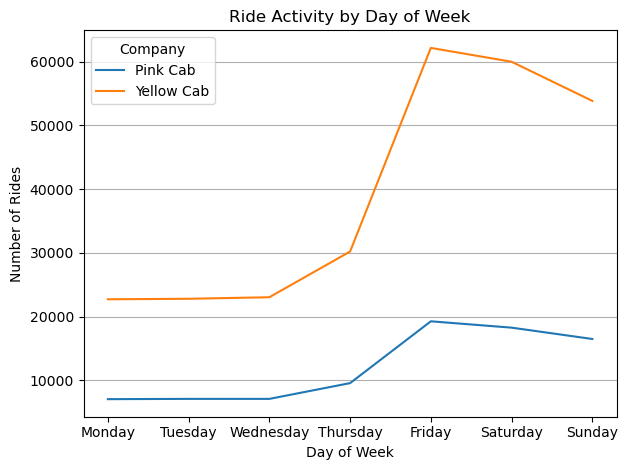

In [817]:
plt.Figure(figsize=(14,5))
sns.lineplot(data=Week_Rides,x='Day of Week',y='Total Rides',hue='Company')
plt.title('Ride Activity by Day of Week')
plt.ylabel('Number of Rides')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Conclusion 
Both companies show increased activity on weekends, but Yellow Cab sees higher ride volumes, indicating stronger weekend preference, which may indicate better service availability or popularity for personal travel use.

## Hypothesis 7: Yellow cab covers a higher percentage of total cab users in most cities.

In [818]:
City_Customer = Master_Data.groupby(['City','Company'])['Customer ID'].nunique().reset_index()
City_Customer.rename(columns={'Customer ID':'Company User'},inplace=True)

In [819]:
Total_Customer_City = pd.merge(City_Customer,df_city,on='City',how='left')
Total_Customer_City['Users'] = Total_Customer_City['Users'].astype(str).str.replace(',', '').astype(int)
Total_Customer_City['Coverage %'] = (Total_Customer_City['Company User'] / Total_Customer_City['Users']) * 100

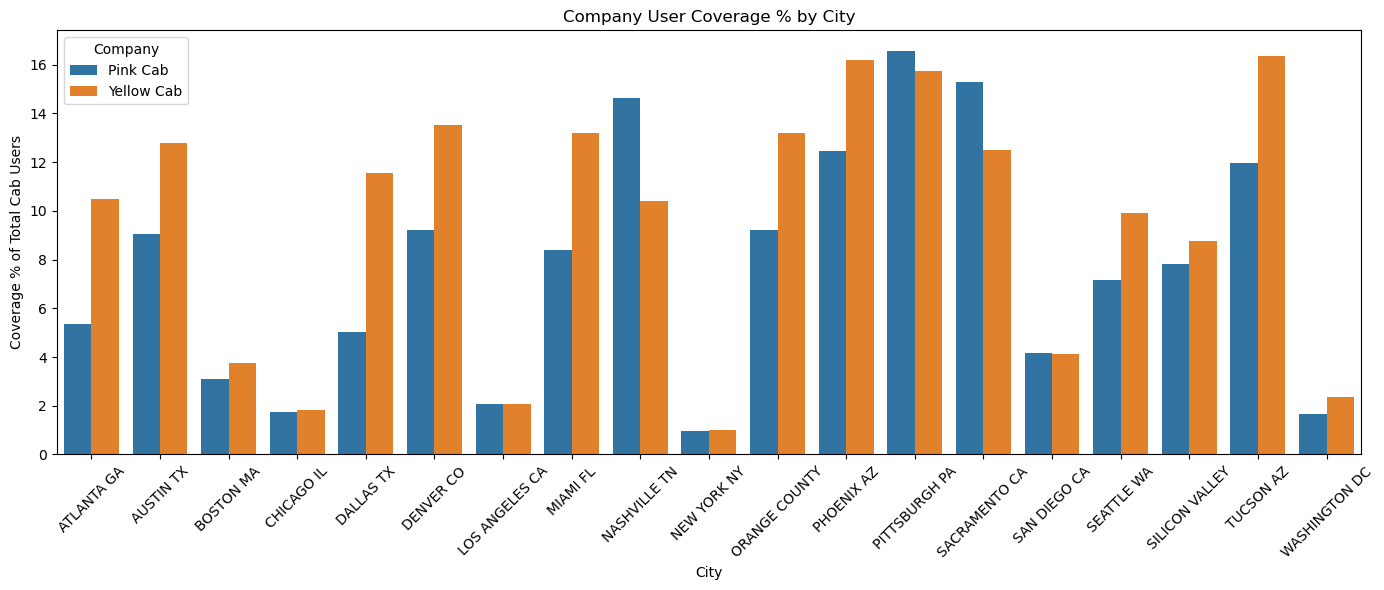

In [820]:
plt.figure(figsize=(14, 6))
sns.barplot(data=Total_Customer_City, x='City', y='Coverage %', hue='Company')
plt.xticks(rotation=45)
plt.title('Company User Coverage % by City')
plt.ylabel('Coverage % of Total Cab Users')
plt.tight_layout()
plt.show()

### Conclusion:
However Pink Cab leads in only a few cities, Yellow Cab serves a larger portion of the available cab market in more cities than Pink Cab, making it a stronger candidate in terms of geographical market share.

## Hypothesis 8: Yellow cab has more balanced reach across all age groups, including senior citizens

In [821]:
bins = [15, 25, 35, 45, 55, 65]
labels = ['16–25', '26–35', '36–45', '46–55', '56–65']
Master_Data['Ages'] = pd.cut(Master_Data['Age'], bins=bins, labels=labels)

In [822]:
ride_by_ages = Master_Data.groupby(['Ages', 'Company'], observed=True)['Transaction ID'].count().reset_index()
ride_by_ages.rename(columns={'Transaction ID': 'Total Rides'}, inplace=True)


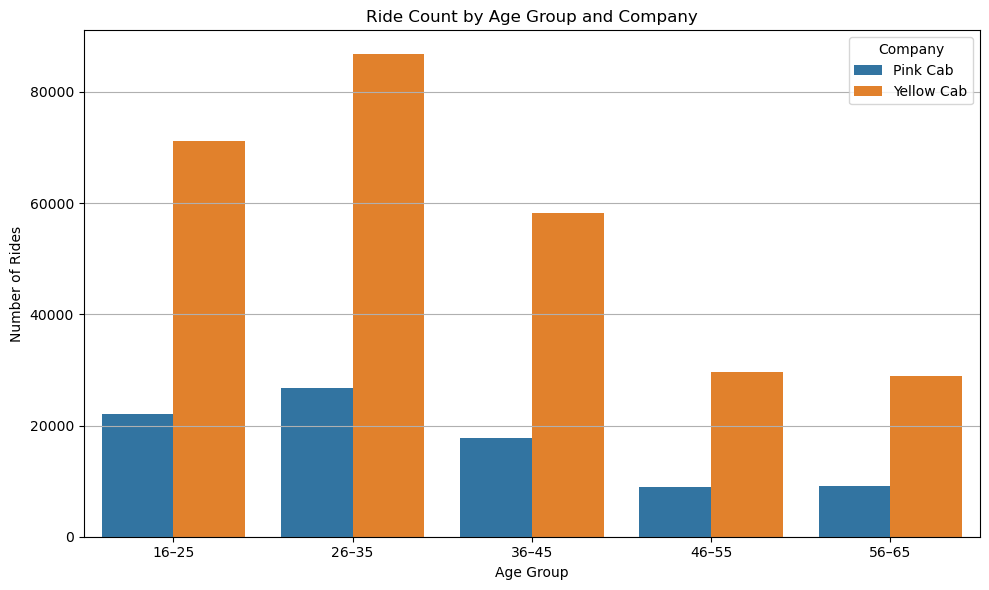

In [823]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ride_by_ages, x='Ages', y='Total Rides', hue='Company')
plt.title('Ride Count by Age Group and Company')
plt.ylabel('Number of Rides')
plt.xlabel('Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()





### Conclusion:
Yellow Cab has a well-balanced distribution across all age groups, especially seniors, which broadens its long-term customer base and makes it a more inclusive investment option.
In contrast, Pink Cab usage drops off in older age bands, suggesting it's less favored by senior customers.

## Hypothesis 9: Ride distance affects customer preference differently across companies

In [824]:
bins = [0, 5, 15, float('inf')]
labels = ['Short (0–5 km)', 'Medium (5–15 km)', 'Long (15+ km)']
Master_Data['Distance'] = pd.cut(Master_Data['KM Travelled'], bins=bins, labels=labels)


In [825]:
distance_usage = Master_Data.groupby(['Distance', 'Company'],observed=True)['Transaction ID'].count().reset_index()
distance_usage.rename(columns={'Transaction ID': 'Total Rides'}, inplace=True)


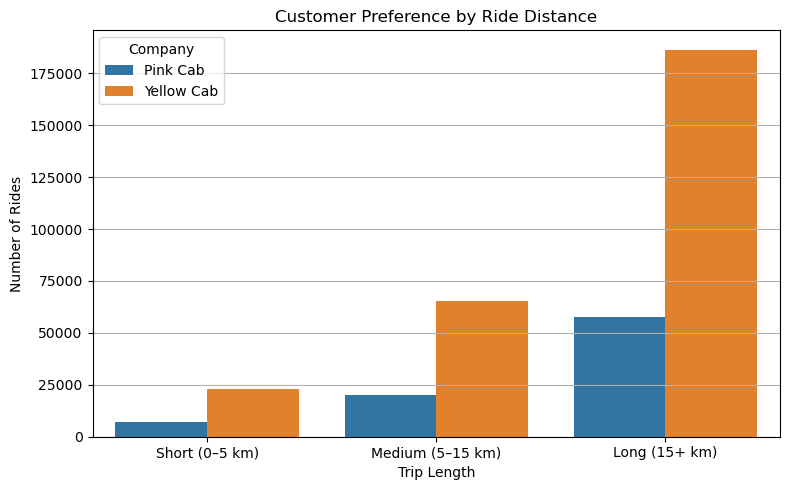

In [826]:
plt.figure(figsize=(8, 5))
sns.barplot(data=distance_usage, x='Distance', y='Total Rides', hue='Company')
plt.title('Customer Preference by Ride Distance')
plt.ylabel('Number of Rides')
plt.xlabel('Trip Length')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Conclusion
Yellow Cab has higher ride volume across all trip distances, including short, medium, and long trips.  
This indicates that Yellow Cab is consistently preferred for all types of travel, whether quick local trips or longer commutes.

## Hypothesis 10: Payment mode preference differs by city and company

In [827]:
Payment_Data = Master_Data.groupby(['City','Company','Payment_Mode'])['Transaction ID'].count().reset_index()

In [828]:
Payment_Data.rename(columns={'Transaction ID': 'Total Rides'},inplace=True)

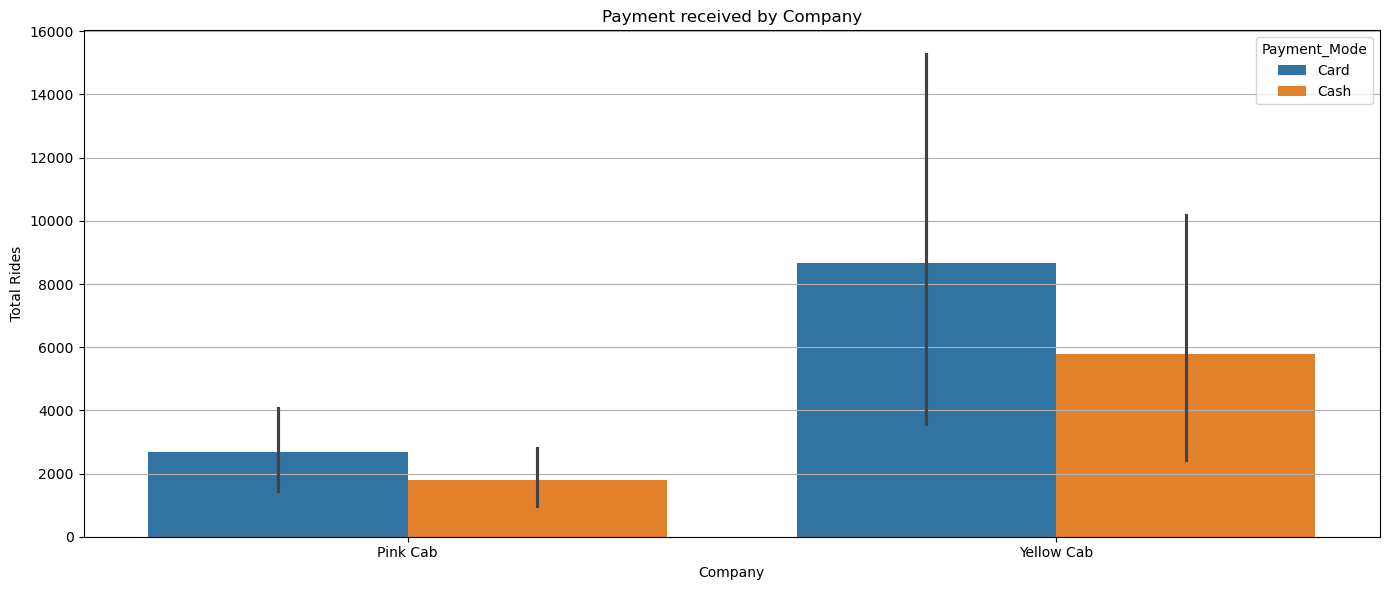

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=Payment_Data, x='Company', y='Total Rides', hue='Payment_Mode')
plt.title('Payment received by Company')
plt.grid(axis='y')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()


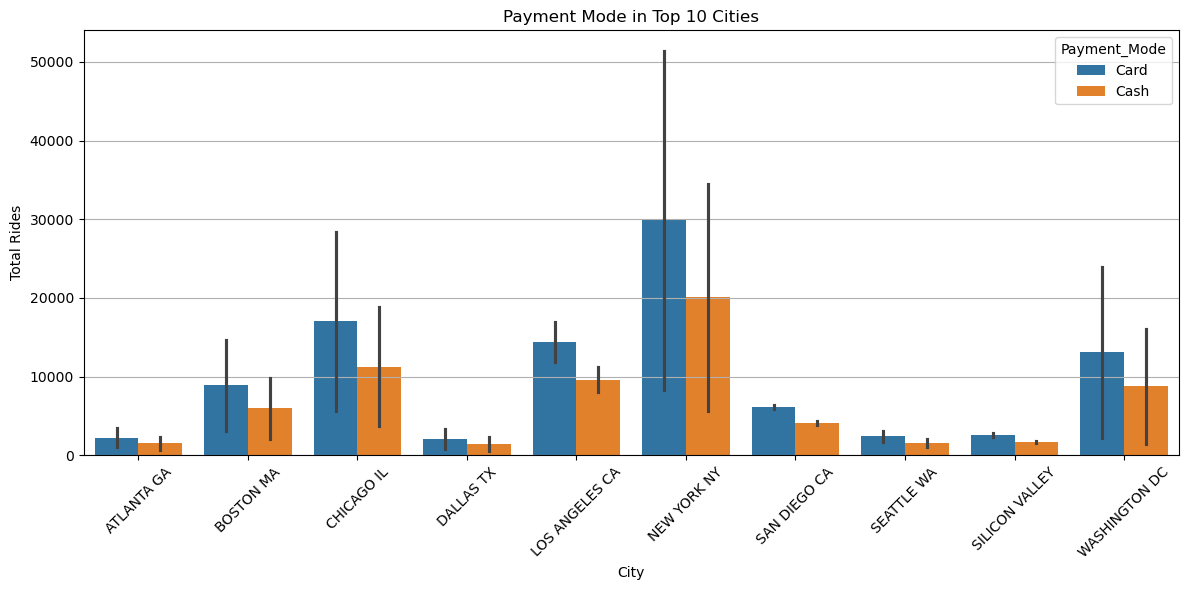

In [830]:
top_cities = Payment_Data.groupby('City')['Total Rides'].sum().nlargest(10).index

top_payment_data = Payment_Data[Payment_Data['City'].isin(top_cities)]


plt.figure(figsize=(12, 6))
sns.barplot(data=top_payment_data, x='City', y='Total Rides', hue='Payment_Mode')
plt.title('Payment Mode in Top 10 Cities')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Conclusion 
Both cab companies tend to be more card-oriented overall, possibly due to their digital presence and operation in urban areas.
However, Pink Cab shows a more balanced ratio of cash and card users in certain cities, suggesting a mix of digitally active and traditional customer bases.

## Final Recommendation

Based on the analysis, **Yellow Cab** is the stronger investment candidate for XYZ. It outperforms Pink Cab in profitability, customer reach, ride volume, and digital readiness.